<a href="https://colab.research.google.com/github/BrandonBosire/WEEK-8-IP/blob/main/WEEK_8_IP_(Brandon_Moreno).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ASSESSMENT:

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

The dataset created can be found [here](http://bit.ly/hypothyroid_data)

### Identifying the question

#### a) Specifying the Question
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### b) Defining the Metric for Success

Creation of a decsion tree based or SVM based model that can predict hyperthyroidism to an accuracy score (f1) of 85%.

#### c) Understanding the context 
The dataset here gives the values of the variables associated with hyperthyroidism based on data collected from patients interviewd at the clinical drive. This is together with the test results for hyperthyroidism of each.

#### d) Recording the Experimental Design



Below is the expected flow of our work:

 - Data Cleaning and Preparation:
   - Load libraries and dataset
   - Deal with missing values
   - Deal with duplicated records
   - Dealing with anomalies
   - Dealing with outliers

 - Perform EDA
   - Univariate Analysis
   - Bivariate Analysis

 - Model creations:

   - Decision Trees:
     - Random Forest
     - Ada Boosted Trees

   - Support Vector Machines:
     - Feature engineering

     - Polynomial Kernel
     - Radial Bias Function Kernel
     - Sigmoid Kernel

     - Feature importance plots (Two features)
     - Hyper parameter tuning of the best model

#### e) Data Relevance
These are the variables at play in our dataset. We will be using them for the creation of the models:

- Age - Age of respondent
- Sex - Gender of respondent
- on_thyroxine - Status of thyroxine intake
- query_on_thyroxine 
- on_antithyroid_medicationthyroid_surgery - Status of thyroid surgery medication intake

- query_hypothyroid
- query_hyperthyroid
- pregnant - Pregnancy status
- sick - Health status
- tumor - Presence of tumor
- lithium - Lithium status
- goitre - Goitre status
- TSH_measured
- TSH
- T3_measured
- T3
- TT4_measured
- TT4

###LOADING LIBRARIES

In [1]:
#Importing our libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score,accuracy_score,f1_score
from sklearn.tree import  DecisionTreeClassifier,export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import metrics



###LOADING DATASET

In [2]:
#Loading our data
#
df=pd.read_csv('/content/hypothyroid (1).csv')


###Previewing dataset

In [3]:
#Previewing the data
#The first five rows
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#The last five rows
#
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
#Identifying the number of rows and columns
#
df.shape

(3163, 26)

In [6]:
# Checking the statistical summary of the dataset
#

df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [7]:
# Checking columns and their data types
#

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

### Checking for missing values

In [8]:
# Checking for null values

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

### Checking for duplicate values

In [9]:
# Checking duplicate values
#

df.duplicated().any()
df.duplicated().sum()

77

In [10]:
#Dropping duplicates
#
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
#Identifying column values
#
cols=df.columns
for col in cols:
  print(col)
  print(df[col].unique())
  print('\n')

status
['hypothyroid' 'negative']


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


sex
['M' 'F' '?']


on_thyroxine
['f' 't']


query_on_thyroxine
['f' 't']


on_antithyroid_medication
['f' 't']


thyroid_surgery
['f' 't']


query_hypothyroid
['f' 't']


query_hyperthyroid
['f' 't']


pregnant
['f' 't']


sick
['f' 't']


tumor
['f' 't']


lithium
['f' 't']


goitre
['f' 't']


TSH_measured
['y' 'n']


TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35

### Dealing with anomalies

In [12]:
#Dealing with where there are anomalies
#
#1
#Here the anomaly is the '?' in the age column (77 cases)
#We will filter out all rows where the age value is '?'
anomaly1=df['sex']!='?'
anomaly1.sum()
df=df.loc[df['sex']!='?']
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [13]:
#2
#Here we will also drop the column TBG 
#seeing that it has all the anomalies (2767 of them)
#This will also be done for the TBG_measured column seeing the two are synonimous
#
TBG=df['TBG']=='?'
TBG.sum()

df=df.drop(df[['TBG','TBG_measured']],axis=1)
df.columns
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44


#### FEATURE ENGINEERING

In [14]:
#Converting all categorical columns into numerical
#We will use LabelEncoder for this
#

#Instantiating encoder
#
en=LabelEncoder()
colstonum=['age','TSH','T3','TT4','T4U','FTI']
for col in df.columns:
  if col not in colstonum:
    df[col]=en.fit_transform(df[col])

### Checking for outliers and deling with them

In [15]:
#We will use boxplots to visualize the numerical data
#But first we will convert the obviously numeric columns from objects to numeric
#
colstonum=['age','TSH','T3','TT4','T4U','FTI']
for col in df[colstonum]:
  df[col]=pd.to_numeric(df[col],errors='coerce')


In [16]:
#Checking that the columns where converted to their correct datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3013 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3013 non-null   int64  
 1   age                        2631 non-null   float64
 2   sex                        3013 non-null   int64  
 3   on_thyroxine               3013 non-null   int64  
 4   query_on_thyroxine         3013 non-null   int64  
 5   on_antithyroid_medication  3013 non-null   int64  
 6   thyroid_surgery            3013 non-null   int64  
 7   query_hypothyroid          3013 non-null   int64  
 8   query_hyperthyroid         3013 non-null   int64  
 9   pregnant                   3013 non-null   int64  
 10  sick                       3013 non-null   int64  
 11  tumor                      3013 non-null   int64  
 12  lithium                    3013 non-null   int64  
 13  goitre                     3013 non-null   int64

###  Dealing with the outliers

In [17]:
#We will use a loop to impute the outliers
#With the mode
#
numerics=['age','TSH','T3','TT4','T4U','FTI']
for col in numerics:
  for i in df[col]:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    Lower= q1 - 1.5 * iqr
    Upper= q3 + 1.5 * iqr
    if i < Lower or i > Upper :
      df[col] = df[col].replace(i,np.mean(df[col])) 


In [18]:
df.isnull().sum()

status                         0
age                          382
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          443
T3_measured                    0
T3                           668
TT4_measured                   0
TT4                          235
T4U_measured                   0
T4U                          234
FTI_measured                   0
FTI                          233
dtype: int64

In [19]:
df.dropna(inplace=True)

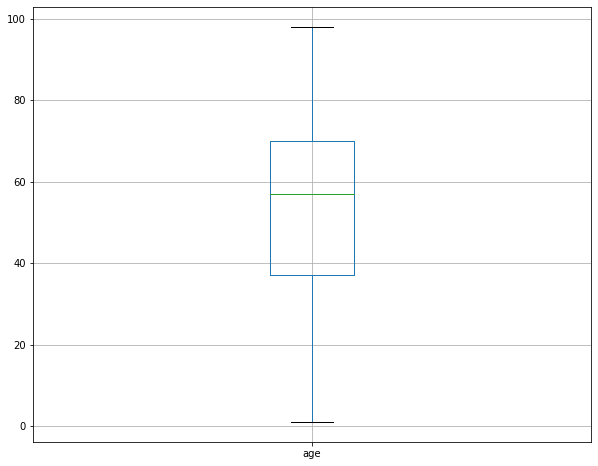

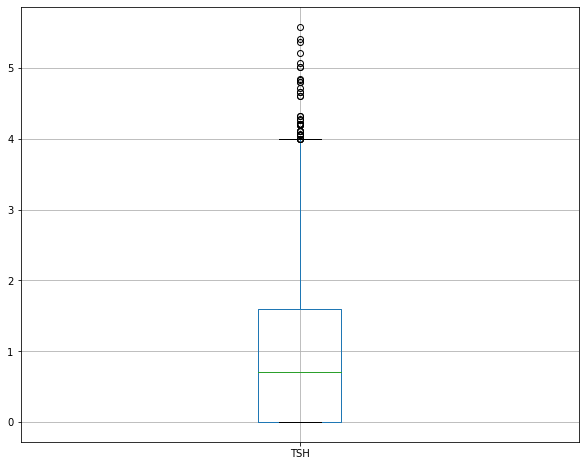

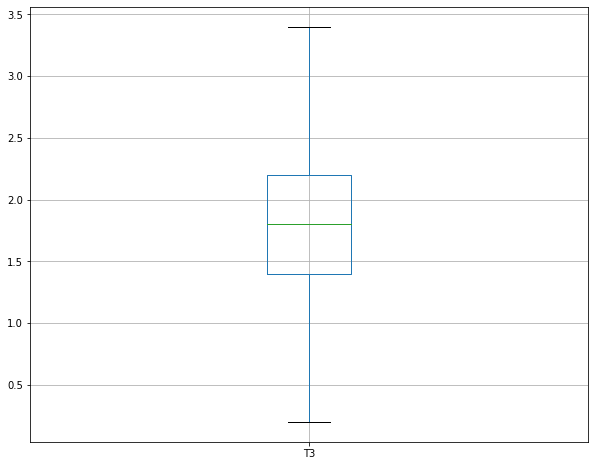

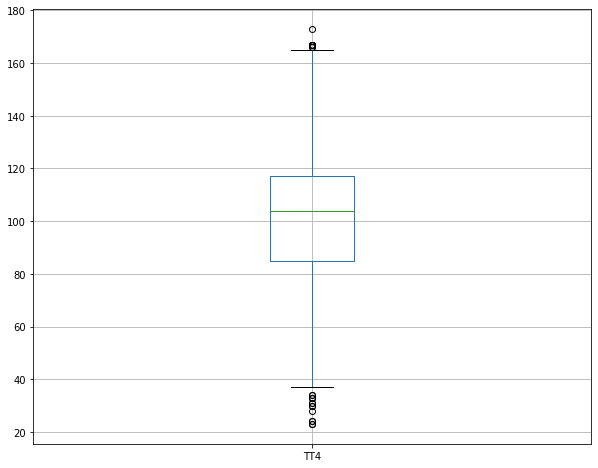

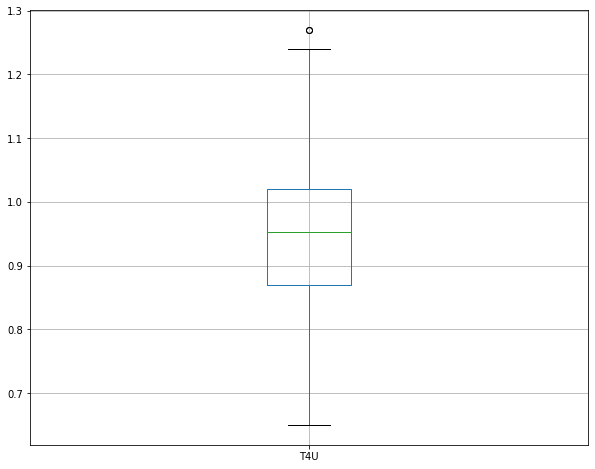

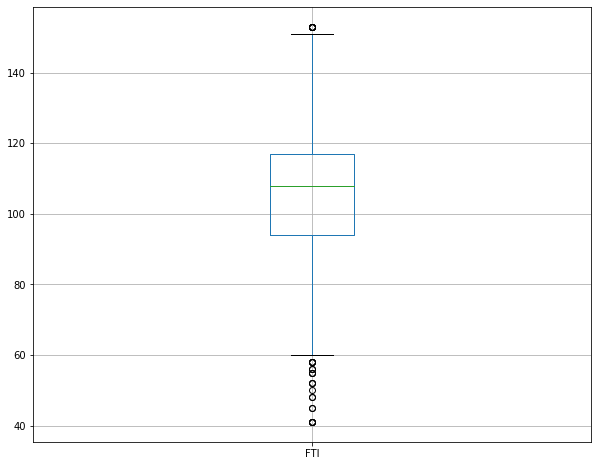

In [20]:
#Now we can create boxplots of them
#
numerics = df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]

for col in numerics:
  plt.figure(figsize = (10, 8))
  df.boxplot([col])

#### UNIVARIATE ANALYSIS

In [21]:
#Distribution plot of Thyroid statuses
#
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


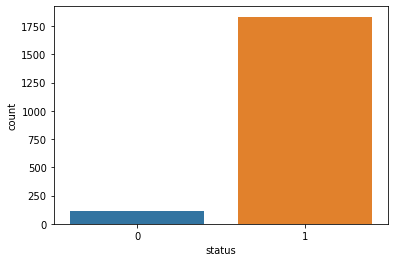

In [22]:
#Plot a histogram showing people with or without hypothyroidism
sns.countplot(df['status'])
plt.show()

#### There are more people diagnosed with Hyperthyroidism than without.

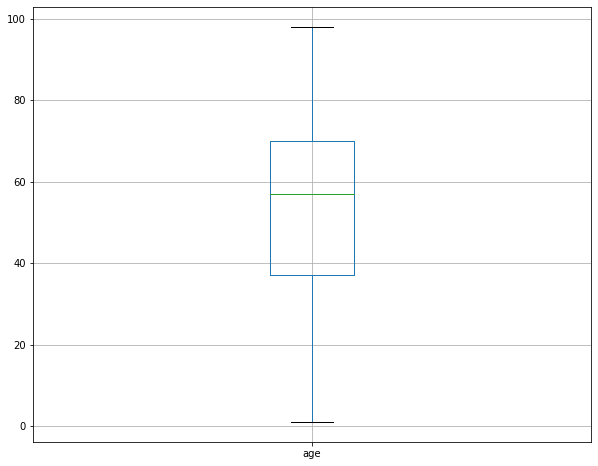

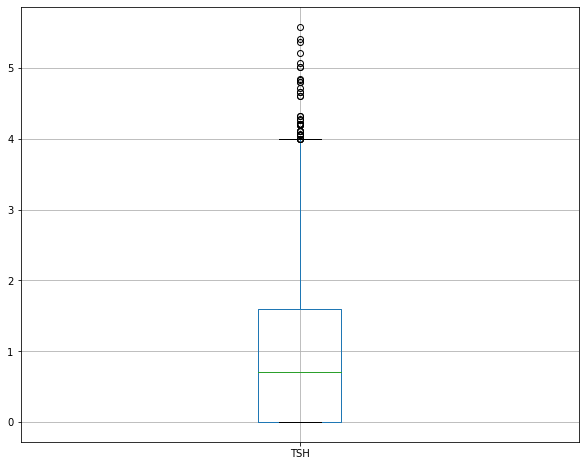

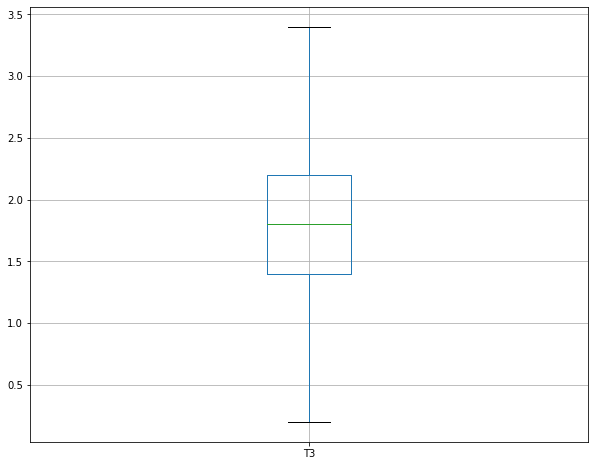

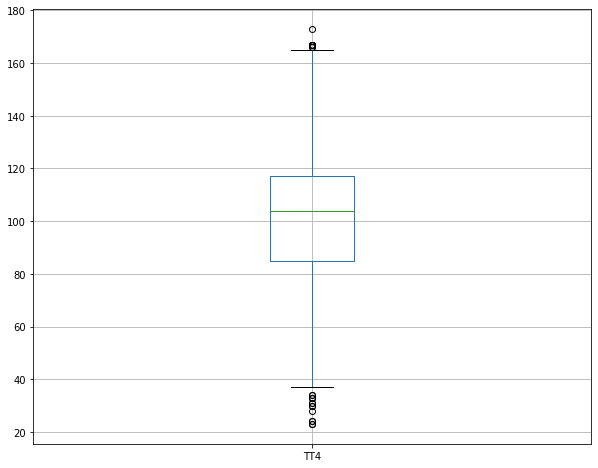

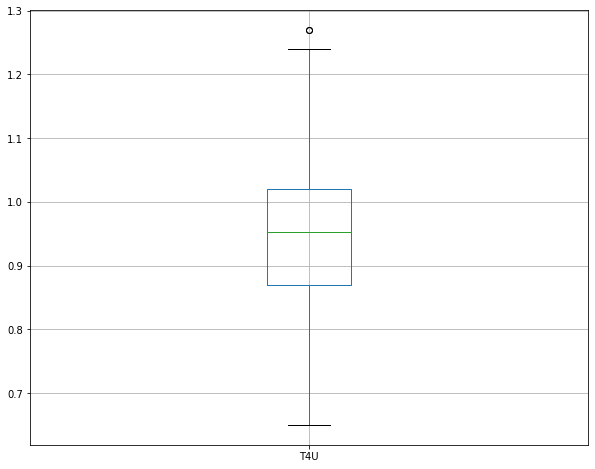

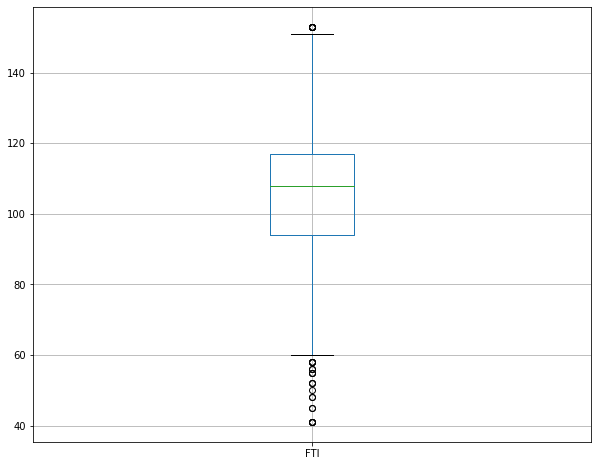

In [23]:
#We can now compare the boxplots
#Now we can create boxplots of them
#
for col in numerics:
  plt.figure(figsize = (10, 8))
  df.boxplot([col])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

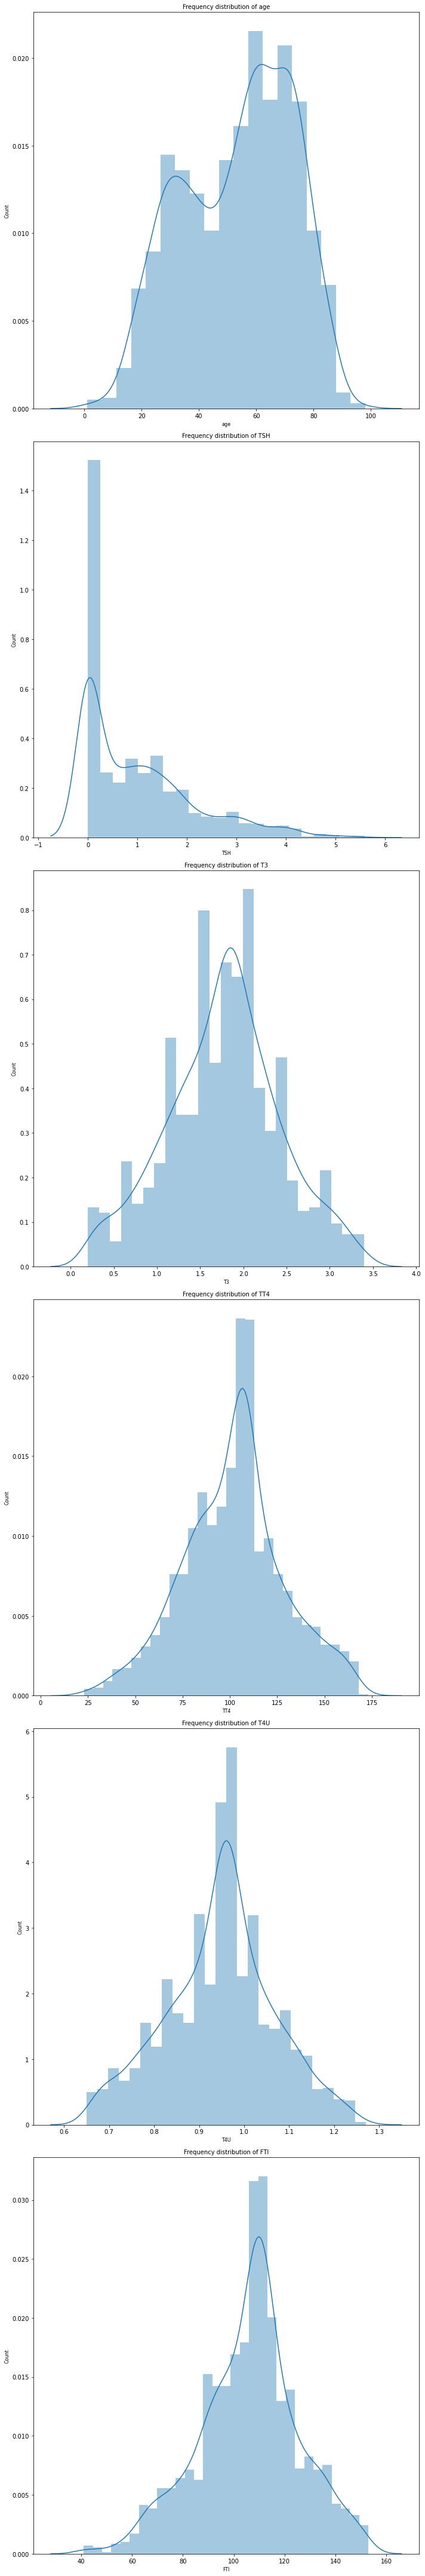

In [55]:
#Distribution plots for numerical columns
#
col=numerics.columns
fig, ax = plt.subplots(len(col), figsize=(10,60))

for i, col in enumerate(col):

    sns.distplot(df[col], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col, fontsize=10)
    ax[i].set_xlabel(col, fontsize=8,)
    ax[i].set_ylabel('Count', fontsize=8)   
plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS

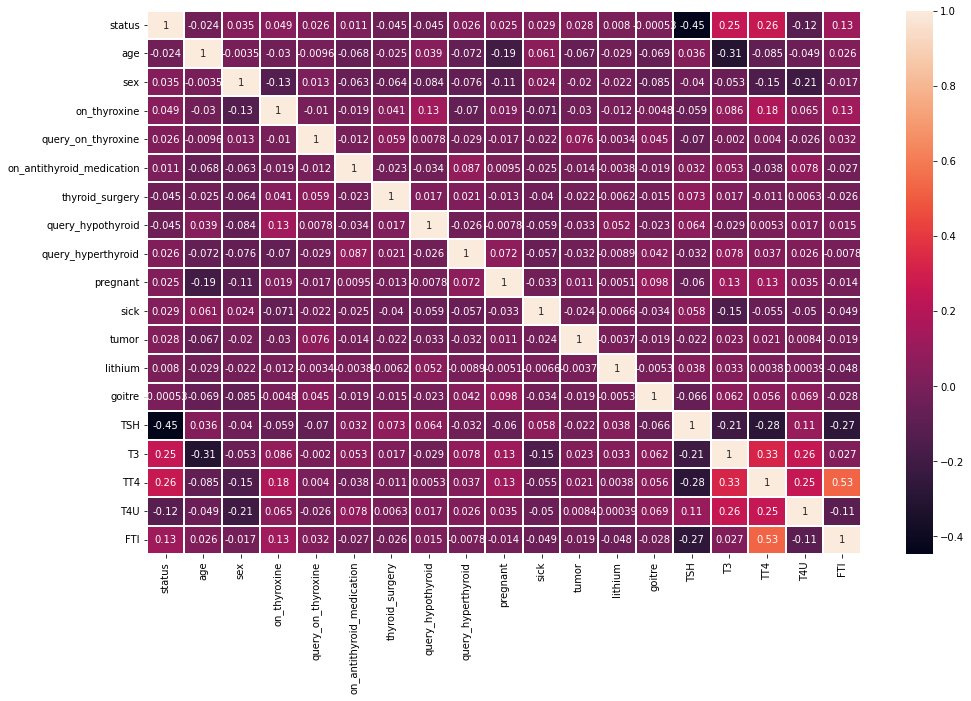

In [61]:
#Creating pearson correlation matrix for all columns excluding the boolean 'measured' columns
#These are irrelevant as are only necessary if the value is true
#
cor_columns=df[['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
        'TSH', 'T3', 'TT4',
        'T4U', 'FTI']]
cor=cor_columns.corr()

#Then creating heatmap
#
plt.figure(figsize=(16,10))
sns.heatmap(cor,linewidths='1',annot=True)

The highest positive correlations are between:
 - TSH and age(0.45)
 - FTI and TT4 (0.53)
 - TT4 and age (0.26)
 - T4U and T3 (0.25) 
 - T4U and TT4 (0.25)

The highest negative correlations are between:

 - T3 and age (-0.31)
 - TT4 and TSH (-0.29)
 - FTI and TSH (-0.27)

### MULTIVARIATE ANALYSIS:
To do this we will:
- Carry out Feature engineering 

- Create a model based on Decision Trees:
  - Utilize Random forest classifier
  - Utilize Ada Boosted Decision trees


- Create a model based on SVM:
   - Utilize Polynomial SVM
   - Utilize RBF SVM
   - Utilize Sigmoid SVM    

## 1. DECISION TREE MODELS 

### Random Forest Classifier

In [26]:
#Creating feature and target variables prior to train test spliting
# 
X = df.drop('status',axis=1)
y = df['status'].values

#Before we build any models we will have to take into account the class imbalances
#We will use the SMOTE (Synthetic Minority Oversampling Technique) library
#
Balancesample = SMOTE()
X, y = Balancesample.fit_resample(X, y)
#Spltting into train and test sets
#Training using 80% of our data
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)


In [27]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     1946 non-null   int64  
 1   age                        1946 non-null   float64
 2   sex                        1946 non-null   int64  
 3   on_thyroxine               1946 non-null   int64  
 4   query_on_thyroxine         1946 non-null   int64  
 5   on_antithyroid_medication  1946 non-null   int64  
 6   thyroid_surgery            1946 non-null   int64  
 7   query_hypothyroid          1946 non-null   int64  
 8   query_hyperthyroid         1946 non-null   int64  
 9   pregnant                   1946 non-null   int64  
 10  sick                       1946 non-null   int64  
 11  tumor                      1946 non-null   int64  
 12  lithium                    1946 non-null   int64  
 13  goitre                     1946 non-null   int64

In [28]:
#Instantiating our forest classifier
#
forest=RandomForestClassifier(n_estimators=200,min_samples_split=20,max_depth=11,random_state=21)

#Fitting our trainning sample
#
forest.fit(X_train,y_train)

#Creating predictor variable
#
y_pred=forest.predict(X_test)

In [29]:
#Evaluating model accuracy
#
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))
print("Explained Variance Score :",explained_variance_score(y_test,y_pred))
print("Accuracy :",forest.score(X_test,y_test))
print("F1 Score :",f1_score(y_test,y_pred))



Mean Absolute Error : 0.01907356948228883
Mean Squared Error : 0.01907356948228883
Accuracy Score : 0.9809264305177112
R2 Score : 0.9235416666666667
Explained Variance Score : 0.9235714285714286
Accuracy : 0.9809264305177112
F1 Score : 0.9817232375979111


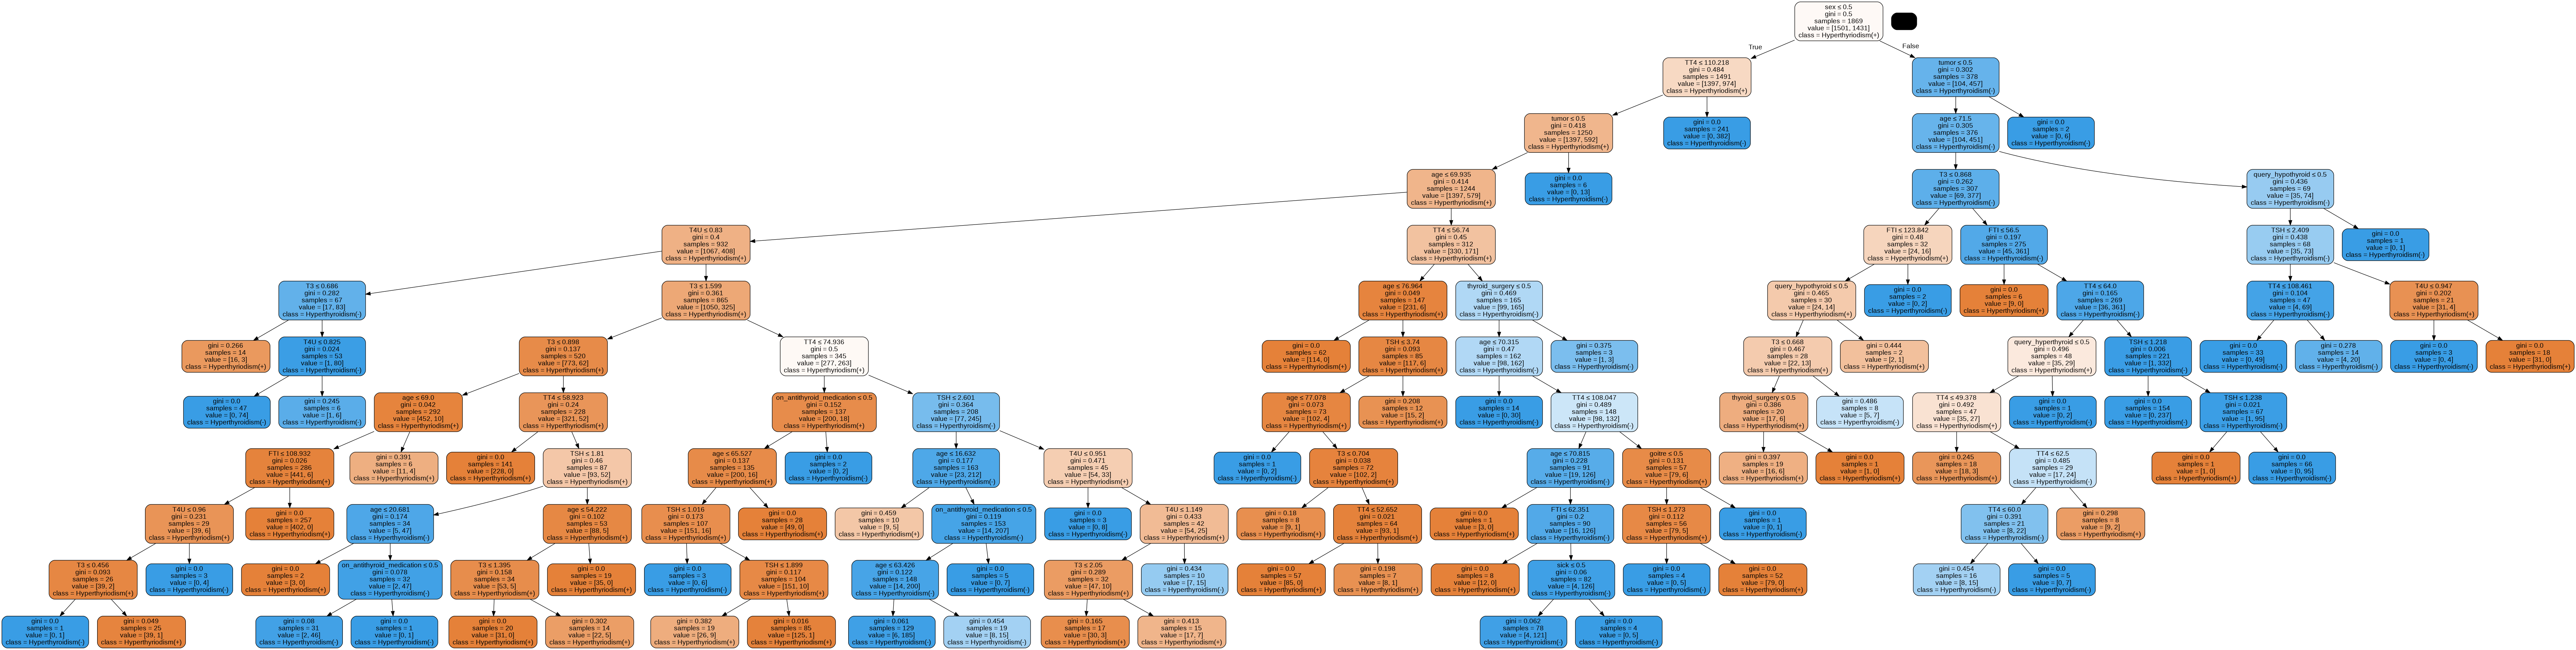

In [30]:
#Visualizing a tree in the forest
#
test_features=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
tree = forest.estimators_[4]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =test_features ,class_names=['Hyperthyriodism(+)','Hyperthyroidism(-)'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Thyroidism_forest.png')
Image(graph.create_png())

In [31]:
#Getting the feature importances for the later part of the project
#

importances = list(tree.feature_importances_)
feature_importances= [(feature,round(importance,2)) for feature,importance in zip(test_features,importances)]
#Sorting in descending order
feature_importances=sorted(feature_importances,key=lambda x :x[1],reverse=True,)
#Printing out feature importances
#[print('Variable : {:25} Importance:{}'.format(*pair)) for pair in feature_importances]

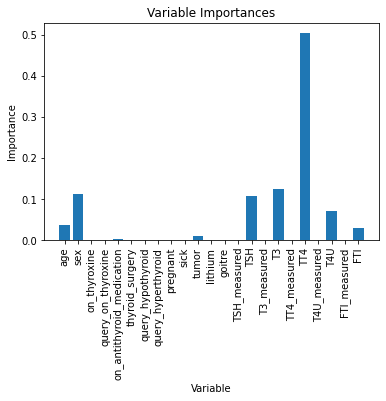

In [32]:
#Plotting the importances
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### ADA BOOSTING
We will use the RandomForestClassifier from above to boost the values from the Forest

In [33]:
#Initializing the Ada Boost Classifier
#
ada_classifier= AdaBoostClassifier(n_estimators=500,learning_rate=0.3)

#Fitting the classifier to our model
#
ada_classifier.fit(X_train,y_train)

#Creating a prediction variable
#
y_pred=ada_classifier.predict(X_test)

In [34]:
#Evaluating our model
#
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))
print("Explained Variance Score :",explained_variance_score(y_test,y_pred))
print("Accuracy :",ada_classifier.score(X_test,y_test))
print("F1 Score :",f1_score(y_test,y_pred))



Mean Absolute Error : 0.01907356948228883
Mean Squared Error : 0.01907356948228883
Accuracy Score : 0.9809264305177112
R2 Score : 0.9235416666666667
Explained Variance Score : 0.9236607142857143
Accuracy : 0.9809264305177112
F1 Score : 0.9816753926701569


In [35]:
#Getting the feature importances for the later part of the project
#
importances = list(ada_classifier.feature_importances_)
feature_importances= [(feature,round(importance,2)) for feature,importance in zip(test_features,importances)]
#Sorting in descending order
feature_importances=sorted(feature_importances,key=lambda x :x[1],reverse=True)
#Printing out feature importances
#[print('Variable : {:25} Importance:{}'.format(*pair)) for pair in feature_importances]

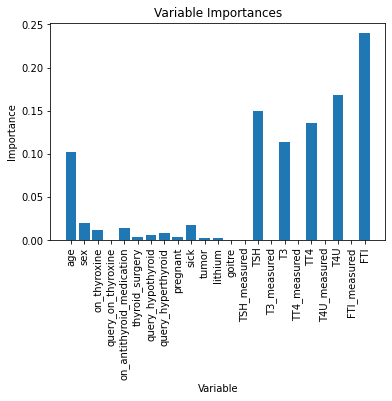

In [36]:
#Plotting the importances
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## 2. SUPPORT VECTOR MACHINE MODELS 

#### Here we will utilise the top 5 fetatures from the feature importances of both the ADA boost as well the RandomForestClassifier.

These will be:
 - TSH
 - TT4
 - T3
 - T4U
 - FTI

In [37]:
#Creating the new independent and dependent variable
#
X=df[['TSH','TT4','T3','T4U','FTI']]
y=df[['status']] 

#Spltting into train and test sets
#Training using 80% of our data
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)


#### i) Polynomial SVM

In [38]:
#Polynomial SVM
#Initializing the Polynomial SVM
#
poly_SVM= SVC(kernel='poly')

#Fitting the classifier to our model
#
poly_SVM.fit(X_train,y_train)

#Creating a prediction variable
#
y_pred=poly_SVM.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#Evaluating our model
#
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))
print("Explained Variance Score :",explained_variance_score(y_test,y_pred))
print("Accuracy :",poly_SVM.score(X_test,y_test))
print("F1 Score :",f1_score(y_test,y_pred))


Mean Absolute Error : 0.0641025641025641
Mean Squared Error : 0.0641025641025641
Accuracy Score : 0.9358974358974359
R2 Score : -0.06849315068493156
Explained Variance Score : 0.0
Accuracy : 0.9358974358974359
F1 Score : 0.9668874172185431


#### ii) Radial Bias Function SVM

In [40]:
#RBF SVM
#Initializing the Radial Bias Function SVM
#
rbf_SVM= SVC(kernel='rbf')

#Fitting the classifier to our model
#
rbf_SVM.fit(X_train,y_train)

#Creating a prediction variable
#
y_pred=poly_SVM.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
#Evaluating our model
#
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))
print("Explained Variance Score :",explained_variance_score(y_test,y_pred))
print("Accuracy :",poly_SVM.score(X_test,y_test))
print("F1 Score :",f1_score(y_test,y_pred))

Mean Absolute Error : 0.0641025641025641
Mean Squared Error : 0.0641025641025641
Accuracy Score : 0.9358974358974359
R2 Score : -0.06849315068493156
Explained Variance Score : 0.0
Accuracy : 0.9358974358974359
F1 Score : 0.9668874172185431


#### iii) Sigmoid SVM

In [42]:
#Sigmoid SVM
#Initializing the Sigmoid SVM
#
sigmoid_SVM= SVC(kernel='sigmoid')

#Fitting the classifier to our model
#
sigmoid_SVM.fit(X_train,y_train)

#Creating a prediction variable
#
y_pred=sigmoid_SVM.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
#Evaluating our model
#
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))
print("Explained Variance Score :",explained_variance_score(y_test,y_pred))
print("Accuracy :",sigmoid_SVM.score(X_test,y_test))
print("F1 Score :",f1_score(y_test,y_pred))

Mean Absolute Error : 0.08205128205128205
Mean Squared Error : 0.08205128205128205
Accuracy Score : 0.9179487179487179
R2 Score : -0.3676712328767122
Explained Variance Score : -0.3321643835616441
Accuracy : 0.9179487179487179
F1 Score : 0.9572192513368984


#### Hyperparameter tuning of the SVM Classifier

##### We will tune our best model out of the three. This is:
 -  Sigmoid : We are using thr f1 score and based on the r2 and explined variance score ,which indicate heavy overfitting,will require that the precision and recall weighting average power of f1 ,and the fact that this is a classification project, will be the better metric.

In [44]:
#Instantiating gridsearcher
#
Predictor = SVC(kernel='sigmoid')
param_grid = {'C': [0.1, -1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              }
sigmoid_grid = GridSearchCV(Predictor,param_grid,n_jobs=-1,scoring='f1')
#Fitting our searcher to train set
#
sigmoid_grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

GridSearchCV(estimator=SVC(kernel='sigmoid'), n_jobs=-1,
             param_grid={'C': [0.1, -1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='f1')

In [45]:
metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [46]:
#Finding best parameters and score
print(sigmoid_grid.best_params_)
print(sigmoid_grid.best_score_)

{'C': 0.1, 'gamma': 1}
0.970899206717782


In [47]:
#Fitting our best parameters onto the sigmoid SVC
#
Sigmoid_tuned = SVC(kernel='sigmoid',C=0.1, gamma=1)

#Fitting or train set
#
Sigmoid_tuned.fit(X_train,y_train)

#Creating predictor variable
#
y_pred=Sigmoid_tuned.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#Evaluating our model
#
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))
print("Explained Variance Score :",explained_variance_score(y_test,y_pred))
print("Accuracy :",Sigmoid_tuned.score(X_test,y_test))
print("F1 Score :",f1_score(y_test,y_pred))

Mean Absolute Error : 0.0641025641025641
Mean Squared Error : 0.0641025641025641
Accuracy Score : 0.9358974358974359
R2 Score : -0.06849315068493156
Explained Variance Score : 0.0
Accuracy : 0.9358974358974359
F1 Score : 0.9668874172185431


#### Challenging the solution
In our case the outcome would most likely have been altered significantly by the simple act of increase the dataset size. After cleaning our remaining variables turned out to nearly one third the original size.

### Conclusion
# From the above,the best model regardless is the Ada Boost Trees.This is because the other models are overfitting which will really affect the prediction of unseen data.